In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json

### Load data

In [75]:
date = "2022-03-15_09-58-23"

data_file = f"../trainings/{date}.npz"
data = np.load(data_file)
for key, value in data.items():
    print(key, value.shape)
    
hp_file = f"../trainings/{date}.json"
with open(hp_file) as json_file:
    hp = json.load(json_file)

accuracys (21, 2)
dbis (21, 2)
losses (1001,)
gradients (1001,)
params (5, 4, 2)


### Load classical data

In [98]:
date_cl = "2022-03-15_11-13-30_classical"

data_file_cl = f"../trainings/{date_cl}.npz"
data_cl = np.load(data_file_cl)
for key, value in data_cl.items():
    print(key, value.shape)
    
hp_file_cl = f"../trainings/{date}.json"
with open(hp_file_cl) as json_file:
    hp_cl = json.load(json_file)

accuracys (20, 2)
losses (1000,)
gradients (1000,)
params (5, 4, 2)


### Smooth the loss with a sliding window

In [106]:
smoothed_losses = np.zeros(data["losses"].shape)
window_size = 50

for i in range(len(data["losses"])):
    if i < window_size/2:  
        smoothed_losses[i] = np.average(data["losses"][i:i+window_size])
    elif i < len(data["losses"]) - window_size/2:
        smoothed_losses[i] = np.average(data["losses"][i-(window_size//2):i+(window_size//2)])    
    else:
        smoothed_losses[i] = np.average(data["losses"][i-window_size:i])

In [ ]:
smoothed_losses_cl = np.zeros(data_cl["losses"].shape)
window_size = 50

for i in range(len(data_cl["losses"])):
    if i < window_size/2:  
        smoothed_losses_cl[i] = np.average(data_cl["losses"][i:i+window_size])
    elif i < len(data_cl["losses"]) - window_size/2:
        smoothed_losses_cl[i] = np.average(data_cl["losses"][i-(window_size//2):i+(window_size//2)])    
    else:
        smoothed_losses_cl[i] = np.average(data_cl["losses"][i-window_size:i])

### Smooth the gradients with a sliding window

In [108]:
smoothed_gradients = np.zeros(data["gradients"].shape)
window_size = 50

for i in range(len(data["gradients"])):
    if i < window_size/2:  
        smoothed_gradients[i] = np.average(data["gradients"][i:i+window_size])
    elif i < len(data["gradients"]) - window_size/2:
        smoothed_gradients[i] = np.average(data["gradients"][i-(window_size//2):i+(window_size//2)])    
    else:
        smoothed_gradients[i] = np.average(data["gradients"][i-window_size:i])

In [110]:
smoothed_gradients_cl = np.zeros(data_cl["gradients"].shape)
window_size = 50

for i in range(len(data_cl["gradients"])):
    if i < window_size/2:  
        smoothed_gradients_cl[i] = np.average(data_cl["gradients"][i:i+window_size])
    elif i < len(data_cl["gradients"]) - window_size/2:
        smoothed_gradients_cl[i] = np.average(data_cl["gradients"][i-(window_size//2):i+(window_size//2)])    
    else:
        smoothed_gradients_cl[i] = np.average(data_cl["gradients"][i-window_size:i])

### Plot Training

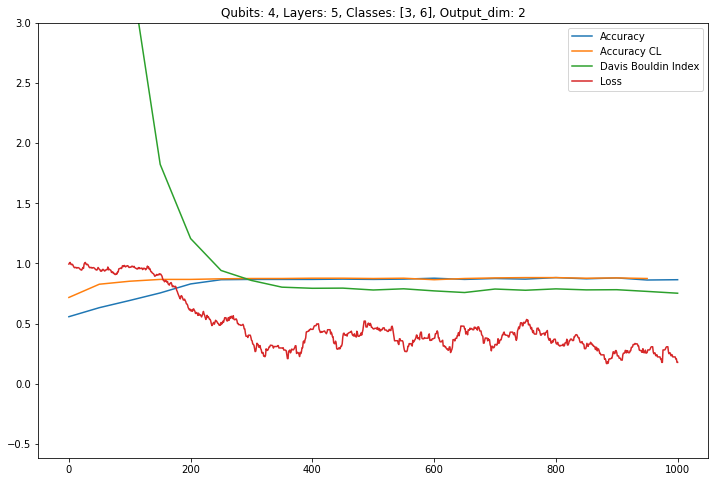

In [107]:
title = f"Qubits: {hp['qubits']}, " + \
        f"Layers: {hp['layers']}, " + \
        f"Classes: {hp['classes']}, " + \
        f"Output_dim: {hp['output_qubits']}"
plt.figure(figsize=(12,8))
plt.plot(data["accuracys"][:, 0], data["accuracys"][:, 1], label="Accuracy")
plt.plot(data_cl["accuracys"][:, 0], data_cl["accuracys"][:, 1], label="Accuracy CL")
if len(data["dbis"]) > 0:
    plt.plot(data["dbis"][:, 0], data["dbis"][:, 1], label="Davis Bouldin Index")
plt.plot(np.arange(len(smoothed_losses)), smoothed_losses, label="Loss")
plt.title(title)
plt.ylim(ymax = 3)
plt.legend()
plt.show()

### Plot Loss Buckets

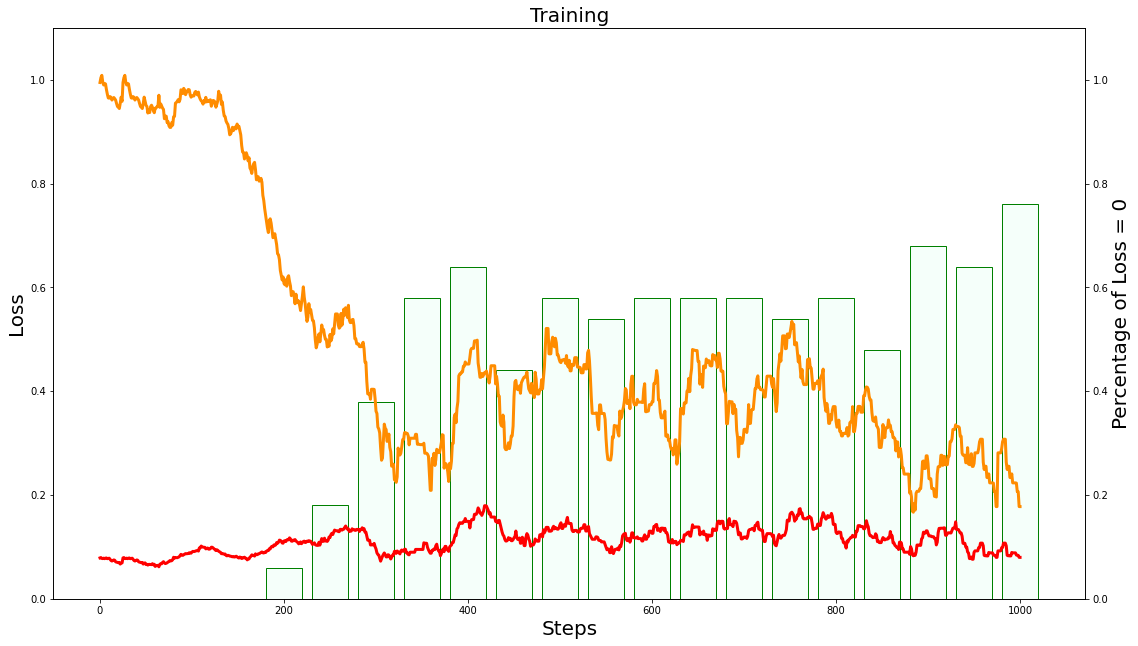

In [109]:
bucket_size = 50
n_buckets = data["gradients"].shape[0] // bucket_size
grad_buckets = np.array_split(data["gradients"][:n_buckets*bucket_size], n_buckets)

zeros = []

for b in grad_buckets:
    zeros.append((b == 0).sum()/50)

x = []
for i in range(0, (n_buckets)*bucket_size, bucket_size):
    x.append(i + bucket_size)  

fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True)
ax2=ax1.twinx()

ax1.set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2

ax1.plot(np.arange(len(smoothed_losses)), smoothed_losses, label="Loss", color="darkorange", linewidth=3)
ax1.plot(np.arange(len(smoothed_gradients)), smoothed_gradients, label="Loss", color="red", linewidth=3)
ax1.set_ylabel("Loss", fontsize=20)
ax1.set_ylim([0, 1.1])
ax2.bar(x, zeros, color="mintcream", edgecolor="green", width=40, zorder=1)
ax2.set_ylabel("Percentage of Loss = 0", fontsize=20)
ax2.set_ylim([0, 1.1])
ax1.set_xlabel("Steps", fontsize=20)

plt.title("Training", fontsize=20)
plt.show()